I.mporting the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

Filtering and categorizing forest fire data into specific sub-regions based on latitude and longitude.

In [2]:
import pandas as pd

# Function to filter data and assign sub-regions
def filter_data_with_subregions(df):
    # Define the regions of interest with sub-region details
    subregions = [
        {
            'name': 'Himalayan Region',
            'min_lat': 32.0, 'max_lat': 37.0, 'min_lon': 73.0, 'max_lon': 80.0,
            'details': 'States: Jammu & Kashmir, Himachal Pradesh, Uttarakhand, Sikkim, Arunachal Pradesh'
        },
        {
            'name': 'Central India - Satpura Range',
            'min_lat': 20.0, 'max_lat': 26.0, 'min_lon': 75.0, 'max_lon': 80.0,
            'details': 'Central India: Includes Satpura Range, Kanha, Bandhavgarh National Parks'
        },
        {
            'name': 'Central India - Achanakmar Sanctuary',
            'min_lat': 20.0, 'max_lat': 22.0, 'min_lon': 82.0, 'max_lon': 83.0,
            'details': 'Central India: Achanakmar Wildlife Sanctuary'
        },
        {
            'name': 'Eastern Ghats - Nallamalai Hills',
            'min_lat': 15.0, 'max_lat': 18.0, 'min_lon': 78.0, 'max_lon': 81.0,
            'details': 'Eastern Ghats: Includes Nallamalai Hills'
        },
        {
            'name': 'Eastern Ghats - Simlipal National Park',
            'min_lat': 21.5, 'max_lat': 22.5, 'min_lon': 86.0, 'max_lon': 87.0,
            'details': 'Eastern Ghats: Simlipal National Park'
        },
        {
            'name': 'Western Ghats - Periyar Tiger Reserve',
            'min_lat': 9.0, 'max_lat': 10.0, 'min_lon': 76.0, 'max_lon': 77.0,
            'details': 'Western Ghats: Periyar Tiger Reserve, Kerala'
        },
        {
            'name': 'Western Ghats - Bandipur National Park',
            'min_lat': 11.0, 'max_lat': 12.0, 'min_lon': 76.0, 'max_lon': 77.0,
            'details': 'Western Ghats: Bandipur National Park, Karnataka'
        },
        {
            'name': 'Northeastern India - Kaziranga National Park',
            'min_lat': 26.5, 'max_lat': 27.5, 'min_lon': 93.0, 'max_lon': 94.0,
            'details': 'Northeastern India: Kaziranga National Park, Assam'
        },
        {
            'name': 'Southern India - Nilgiri Biosphere Reserve',
            'min_lat': 11.0, 'max_lat': 12.0, 'min_lon': 76.0, 'max_lon': 77.0,
            'details': 'Southern India: Nilgiri Biosphere Reserve, Tamil Nadu/Karnataka'
        }
    ]
    
    # Filter data and add region details
    filtered_df = pd.DataFrame()

    for region in subregions:
        condition = (
            (df['latitude'] >= region['min_lat']) &
            (df['latitude'] <= region['max_lat']) &
            (df['longitude'] >= region['min_lon']) &
            (df['longitude'] <= region['max_lon'])
        )
        temp_df = df[condition].copy()
        temp_df['region'] = region['name']
        temp_df['region_details'] = region['details']
        filtered_df = pd.concat([filtered_df, temp_df])
    
    return filtered_df

#file_path = r  # Replace with your file path
df = pd.read_csv("Project_Final_Dataset.csv")

# Filter data with subregions
df_filtered = filter_data_with_subregions(df)

# Save the filtered dataset with region and details columns
df_filtered.to_csv('filtered_forest_fire_data_with_regions.csv', index=False)

# Display first few rows of the filtered data
print(df_filtered.head())


            date         time  latitude  longitude       cvl       cvh  \
5915  2017-04-25  08:00:00 AM     32.25       76.0  0.918736  0.081264   
5916  2017-04-25  08:00:00 AM     32.25       76.0  0.918736  0.081264   
5936  2017-04-25  09:00:00 AM     32.25       76.0  0.918736  0.081264   
5937  2017-04-25  09:00:00 AM     32.25       76.0  0.918736  0.081264   
5957  2017-04-25  10:00:00 AM     32.25       76.0  0.918736  0.081264   

        lai_lv    lai_hv        t2m      u100  brightness satellite  \
5915  2.715088  1.864624  303.68726  2.915024       335.5      Aqua   
5916  2.715088  1.864624  303.68726  2.915024       331.1      Aqua   
5936  2.715088  1.864624  304.18115  2.186493       335.5      Aqua   
5937  2.715088  1.864624  304.18115  2.186493       331.1      Aqua   
5957  2.715088  1.864624  302.30470  2.592834       335.5      Aqua   

     instrument  confidence  bright_t31   frp daynight            region  \
5915      MODIS          83       305.6  41.9       

reducing records to one per day per location based on the highest fire radiative power (frp).


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("filtered_forest_fire_data_with_regions.csv")

# Step 1: Remove rows where any column has a value of 0 or 1
df = df[~df.isin([0, 1]).any(axis=1)]

# Step 2: Ensure the `date` column is in datetime format and drop invalid dates
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert 'date' to datetime
df = df.dropna(subset=['date'])  # Remove rows where 'date' is NaT

# Step 3: Keep only one record per day per location (latitude, longitude) based on the highest `frp`
df = df.sort_values('frp', ascending=False).drop_duplicates(['date', 'latitude', 'longitude'])

# Step 4: Sort the dataset by `date` in ascending order
df = df.sort_values('date')

# Step 5: Save the processed dataset
df.to_csv("one_record_day_done.csv", index=False)

print("Processing complete. Saved as 'night_done.csv'.")


Processing complete. Saved as 'night_done.csv'.


combining the 'date' and 'time' columns into a single 'datetime' column, then allows downloading the processed dataset as a CSV file.


In [7]:
import pandas as pd
import io

# Load the dataset from the specified file path
file_path = r"C:\Users\Madhu\OneDrive\Desktop\project\one_record_day_done.csv"  # Replace this with your actual file path
df = pd.read_csv(file_path, dtype={'time': str})

# Combine the 'date' and 'time' columns into a single 'datetime' column
datetime_format = "%Y-%m-%d %I:%M:%S %p"  # Day-Month-Year and 12-hour clock with AM/PM

# Ensure 'time' column is formatted correctly and combine 'date' and 'time'
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format=datetime_format)

# Optional: Drop the original 'date' and 'time' columns
df = df.drop(columns=['date', 'time'])

# Save the processed dataset to an in-memory buffer
buffer = io.StringIO()
df.to_csv(buffer, index=False)
buffer.seek(0)

# Automatically download the CSV file
import base64
from IPython.display import HTML

csv_data = buffer.getvalue()
b64 = base64.b64encode(csv_data.encode()).decode()  # Encode to base64
filename = "processed_dataset.csv"
html_download_link = f'<a href="data:text/csv;base64,{b64}" download="{filename}">Click here to download the processed dataset</a>'

# Display the download link
HTML(html_download_link)


Assigning a new Column called Season based on the Months(Feature Engineering)

In [9]:
# First, ensure that 'datetime' column is in datetime format
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

# Check if conversion was successful
print(data['datetime'].head())

# Extract temporal features
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day

# Define Indian seasons based on months
def get_indian_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    elif month in [10, 11]:
        return 'Post-Monsoon'

# Apply the function to the month column
data['season'] = data['month'].apply(get_indian_season)

# Save the updated DataFrame to a new CSV file
updated_file_path = 'season_updated_dataset_india.csv'
data.to_csv(updated_file_path, index=False)

# Display the updated DataFrame
print(data[['datetime', 'year', 'month', 'day', 'season']].head())


0   2017-01-03 08:00:00
1   2017-01-05 16:00:00
2   2017-01-06 14:00:00
3   2017-01-07 16:00:00
4   2017-01-07 16:00:00
Name: datetime, dtype: datetime64[ns]
             datetime  year  month  day  season
0 2017-01-03 08:00:00  2017      1    3  Winter
1 2017-01-05 16:00:00  2017      1    5  Winter
2 2017-01-06 14:00:00  2017      1    6  Winter
3 2017-01-07 16:00:00  2017      1    7  Winter
4 2017-01-07 16:00:00  2017      1    7  Winter


In [10]:
data = pd.read_csv(r"C:\Users\Madhu\OneDrive\Desktop\project\season_updated_dataset_india.csv")

In [11]:
df.head(5)

,latitude,longitude,cvl,cvh,lai_lv,lai_hv,t2m,u100,brightness,satellite,...,confidence,bright_t31,frp,region,region_details,datetime,year,month,day,season
0,21.25,83.0,0.864984,0.121918,1.647217,2.136230,299.22900,1.470428,309.0,Terra,...,59,297.1,5.0,Central India - Achanakmar Sanctuary,Central India: Achanakmar Wildlife Sanctuary,2017-01-03 08:00:00,2017,1,3,Winter
1,22.00,83.0,0.452770,0.547230,2.189575,1.625366,291.29920,1.659454,325.7,Aqua,...,80,302.6,45.0,Central India - Achanakmar Sanctuary,Central India: Achanakmar Wildlife Sanctuary,2017-01-05 16:00:00,2017,1,5,Winter
2,21.25,77.0,0.492606,0.493317,2.261475,1.750732,299.62320,0.112350,310.9,Terra,...,50,298.4,9.6,Central India - Satpura Range,"Central India: Includes Satpura Range, Kanha, ...",2017-01-06 14:00:00,2017,1,6,Winter
3,21.75,83.0,0.600593,0.399407,1.913330,1.732178,293.41200,-3.889282,315.3,Aqua,...,46,302.6,7.2,Central India - Achanakmar Sanctuary,Central India: Achanakmar Wildlife Sanctuary,2017-01-07 16:00:00,2017,1,7,Winter
4,20.00,82.0,0.034379,0.937775,2.694824,1.803833,293.25378,-0.654907,314.3,Aqua,...,39,304.0,7.8,Central India - Achanakmar Sanctuary,Central India: Achanakmar Wildlife Sanctuary,2017-01-07 16:00:00,2017,1,7,Winter


applyinng Min-Max scaling to the numerical columns of the dataset, excluding 'latitude' and 'longitude', to normalize the features.


In [12]:
from sklearn.preprocessing import MinMaxScaler
# 3. Feature Scaling (Exclude Latitude and Longitude)
numerical_columns = ['cvl', 'cvh', 'lai_lv', 'lai_hv', 't2m', 'u100', 'brightness', 'confidence', 'bright_t31']
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])



In [13]:
df.head(5)

,latitude,longitude,cvl,cvh,lai_lv,lai_hv,t2m,u100,brightness,satellite,...,confidence,bright_t31,frp,region,region_details,datetime,year,month,day,season
0,21.25,83.0,0.865197,0.121886,0.347782,0.322370,0.686127,0.521686,0.064869,Terra,...,0.568421,0.420552,5.0,Central India - Achanakmar Sanctuary,Central India: Achanakmar Wildlife Sanctuary,2017-01-03 08:00:00,2017,1,3,Winter
1,22.00,83.0,0.452795,0.547302,0.535853,0.234416,0.557472,0.532497,0.186589,Aqua,...,0.789474,0.510834,45.0,Central India - Achanakmar Sanctuary,Central India: Achanakmar Wildlife Sanctuary,2017-01-05 16:00:00,2017,1,5,Winter
2,21.25,77.0,0.492649,0.493375,0.560786,0.256000,0.692522,0.444014,0.078717,Terra,...,0.473684,0.441891,9.6,Central India - Satpura Range,"Central India: Includes Satpura Range, Kanha, ...",2017-01-06 14:00:00,2017,1,6,Winter
3,21.75,83.0,0.600686,0.399442,0.440061,0.252806,0.591750,0.215151,0.110787,Aqua,...,0.431579,0.510834,7.2,Central India - Achanakmar Sanctuary,Central India: Achanakmar Wildlife Sanctuary,2017-01-07 16:00:00,2017,1,7,Winter
4,20.00,82.0,0.034213,0.937941,0.711057,0.265142,0.589183,0.400133,0.103499,Aqua,...,0.357895,0.533815,7.8,Central India - Achanakmar Sanctuary,Central India: Achanakmar Wildlife Sanctuary,2017-01-07 16:00:00,2017,1,7,Winter


In [14]:
# Save the DataFrame to a CSV file
df.to_csv('processed_data_19_01_25_home.csv', index=False)
print("File saved as 'processed_data.csv'")


File saved as 'processed_data.csv'


Importing the NeCessary Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [16]:
df.head(5)

,latitude,longitude,cvl,cvh,lai_lv,lai_hv,t2m,u100,brightness,satellite,...,confidence,bright_t31,frp,region,region_details,datetime,year,month,day,season
0,21.25,83.0,0.865197,0.121886,0.347782,0.322370,0.686127,0.521686,0.064869,Terra,...,0.568421,0.420552,5.0,Central India - Achanakmar Sanctuary,Central India: Achanakmar Wildlife Sanctuary,2017-01-03 08:00:00,2017,1,3,Winter
1,22.00,83.0,0.452795,0.547302,0.535853,0.234416,0.557472,0.532497,0.186589,Aqua,...,0.789474,0.510834,45.0,Central India - Achanakmar Sanctuary,Central India: Achanakmar Wildlife Sanctuary,2017-01-05 16:00:00,2017,1,5,Winter
2,21.25,77.0,0.492649,0.493375,0.560786,0.256000,0.692522,0.444014,0.078717,Terra,...,0.473684,0.441891,9.6,Central India - Satpura Range,"Central India: Includes Satpura Range, Kanha, ...",2017-01-06 14:00:00,2017,1,6,Winter
3,21.75,83.0,0.600686,0.399442,0.440061,0.252806,0.591750,0.215151,0.110787,Aqua,...,0.431579,0.510834,7.2,Central India - Achanakmar Sanctuary,Central India: Achanakmar Wildlife Sanctuary,2017-01-07 16:00:00,2017,1,7,Winter
4,20.00,82.0,0.034213,0.937941,0.711057,0.265142,0.589183,0.400133,0.103499,Aqua,...,0.357895,0.533815,7.8,Central India - Achanakmar Sanctuary,Central India: Achanakmar Wildlife Sanctuary,2017-01-07 16:00:00,2017,1,7,Winter


In [17]:
# 1. Summary Statistics
print(df.describe())

          latitude   longitude          cvl          cvh       lai_lv  \
count  2578.000000  2578.00000  2578.000000  2578.000000  2578.000000   
mean     22.241757    79.50514     0.632883     0.351264     0.408962   
min       9.250000    74.00000     0.000000     0.000000     0.000000   
25%      21.250000    77.00000     0.469683     0.152667     0.291674   
50%      22.500000    79.00000     0.652245     0.308345     0.393244   
75%      23.750000    80.00000     0.839752     0.529352     0.515027   
max      34.500000    94.00000     1.000000     1.000000     1.000000   
std       3.390114     3.61515     0.246364     0.247831     0.175796   

            lai_hv          t2m         u100   brightness   confidence  \
count  2578.000000  2578.000000  2578.000000  2578.000000  2578.000000   
mean      0.294265     0.767711     0.479793     0.188846     0.642232   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.240748     0.696471     0.360992  

In [18]:
pip install folium branca

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Geospatial distribution of FRP (Fire Radiative Power) across India from 2017 to 2024 using an interactive map with Plotly.


In [19]:
#All changes in the Geospatial Distribution of FRP by Year(2017-2024)

import plotly.express as px
import pandas as pd

# Ensure 'datetime' column exists and is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract year and month from the datetime column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

# Filter data to include only coordinates within India's boundaries
df = df[
    (df['latitude'] >= 6.0) & (df['latitude'] <= 37.0) &  # Latitude range for India
    (df['longitude'] >= 68.0) & (df['longitude'] <= 97.0)  # Longitude range for India
]

# Filter data for years from 2017 to 2024
df = df[df['year'].between(2017, 2024)]

# Create an interactive scatter map
fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    color="frp",
    opacity=0.7,  # Set point opacity to make overlapping points clearer
    hover_data={
        "latitude": True,
        "longitude": True,
        "frp": True,
        "year": True,
        "month": True,
    },
    animation_frame="year",  # Set animation based on the year
    animation_group="year",
    zoom=4,  # Adjust zoom for better view of India
    center={"lat": 22.9734, "lon": 78.6569},  # Centered on India's approximate geographic center
    mapbox_style="carto-positron",  # High-contrast map style
    color_continuous_scale="Viridis",  # Better color contrast
    title="Geospatial Distribution of FRP by Year (2017-2024)",
)

# Customize the layout for India and slower animation
fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    height=800,  # Increase figure height for better visibility
    width=1200,  # Increase figure width for better visibility
    legend=dict(
        title="FRP Intensity",
        orientation="h",
        y=1.02,
        x=0.5,
        xanchor="center",
    ),
    coloraxis_colorbar=dict(
        title="FRP-Range",
        
    ),
)

# Adjust animation speed to make it slower (e.g., 3000ms per frame)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1500  # Set frame duration to 3000ms (3 seconds per frame)

# Show the map
fig.show()


clustering data points based on geographic subregions in India and visualizes them on a scatter plot with color coding and bubble sizes based on Fire Radiative Power (FRP).


In [20]:
import plotly.express as px
import pandas as pd

# Define subregions
subregions = [
    {'name': 'Himalayan Region', 'min_lat': 32.0, 'max_lat': 37.0, 'min_lon': 73.0, 'max_lon': 80.0},
    {'name': 'Central India - Satpura Range', 'min_lat': 20.0, 'max_lat': 26.0, 'min_lon': 75.0, 'max_lon': 80.0},
    {'name': 'Central India - Achanakmar Sanctuary', 'min_lat': 20.0, 'max_lat': 22.0, 'min_lon': 82.0, 'max_lon': 83.0},
    {'name': 'Eastern Ghats - Nallamalai Hills', 'min_lat': 15.0, 'max_lat': 18.0, 'min_lon': 78.0, 'max_lon': 81.0},
    {'name': 'Eastern Ghats - Simlipal National Park', 'min_lat': 21.5, 'max_lat': 22.5, 'min_lon': 86.0, 'max_lon': 87.0},
    {'name': 'Western Ghats - Periyar Tiger Reserve', 'min_lat': 9.0, 'max_lat': 10.0, 'min_lon': 76.0, 'max_lon': 77.0},
    {'name': 'Western Ghats - Bandipur National Park', 'min_lat': 11.0, 'max_lat': 12.0, 'min_lon': 76.0, 'max_lon': 77.0},
    {'name': 'Northeastern India - Kaziranga National Park', 'min_lat': 26.5, 'max_lat': 27.5, 'min_lon': 93.0, 'max_lon': 94.0},
    {'name': 'Southern India - Nilgiri Biosphere Reserve', 'min_lat': 11.0, 'max_lat': 12.0, 'min_lon': 76.0, 'max_lon': 77.0},
]

# Function to assign data points to subregions
def assign_subregion(row, subregions):
    for i, region in enumerate(subregions):
        if (
            region['min_lat'] <= row['latitude'] <= region['max_lat']
            and region['min_lon'] <= row['longitude'] <= region['max_lon']
        ):
            return i  # Return the subregion index
    return -1  # For points outside predefined subregions

# Add a 'cluster' column to the DataFrame
df['cluster'] = df.apply(assign_subregion, axis=1, subregions=subregions)

# Map cluster IDs to subregion names
subregion_name_map = {i: region['name'] for i, region in enumerate(subregions)}
df['subregion_name'] = df['cluster'].map(subregion_name_map).fillna("Other")

# Create an advanced scatter plot without displaying place names directly
fig = px.scatter(
    df,
    x="longitude",
    y="latitude",
    color="subregion_name",
    size="frp",
    hover_data={
        "latitude": True,
        "longitude": True,
        "frp": True,
        "subregion_name": True,  # Shown only on hover
    },
    title="Clustering Based on Subregions",
    labels={"longitude": "Longitude", "latitude": "Latitude", "subregion_name": "Subregion"},
    opacity=0.8,  # Add transparency to enhance overlapping visuals
    color_discrete_sequence=px.colors.qualitative.Bold,  # Improved color palette
)

# Update layout for a polished look
fig.update_layout(
    template="plotly_white",
    title_font=dict(size=22, family="Arial", color="black"),
    legend_title=dict(text="Subregion", font=dict(size=14)),
    margin=dict(l=50, r=50, t=80, b=50),
    showlegend=True,
)

# Compute min and max FRP for each subregion
cluster_stats = df.groupby("subregion_name")["frp"].agg(["min", "max"]).reset_index()

# Display FRP statistics
print("Subregion FRP Statistics:")
print(cluster_stats)

# Show interactive visualization
fig.show()


Subregion FRP Statistics:
                                 subregion_name   min     max
0          Central India - Achanakmar Sanctuary  3.90  298.30
1                 Central India - Satpura Range  3.57  682.20
2              Eastern Ghats - Nallamalai Hills  4.60  178.90
3        Eastern Ghats - Simlipal National Park  4.00   69.60
4                              Himalayan Region  4.10  218.59
5  Northeastern India - Kaziranga National Park  3.90  591.10
6        Western Ghats - Bandipur National Park  4.80  330.80
7         Western Ghats - Periyar Tiger Reserve  5.00   94.00


correlation matrix heatmap to visualize the relationships between selected features and the target variable (frp).

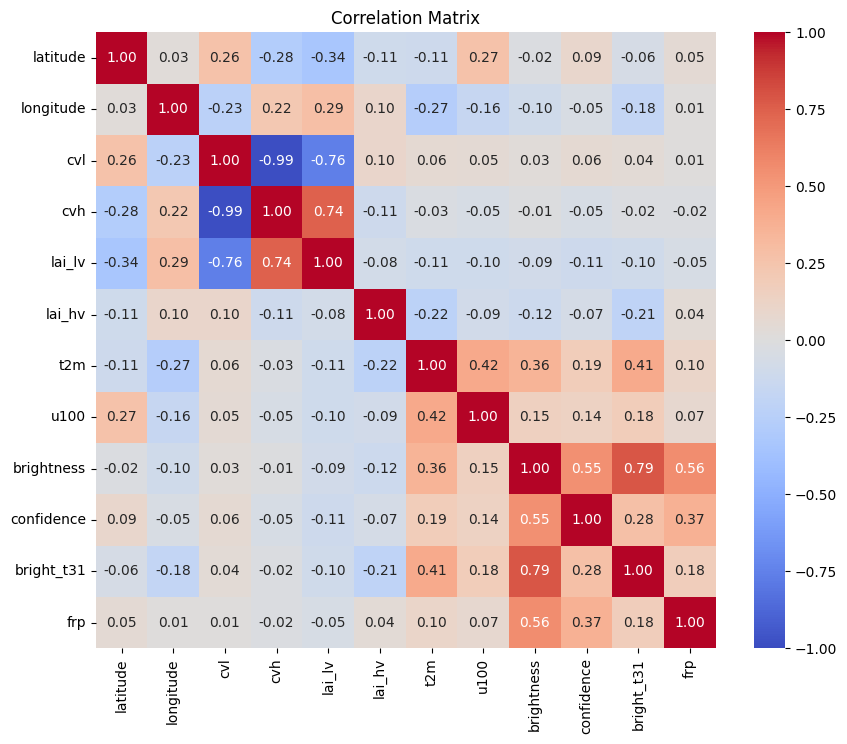

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Define features dynamically
features = ['latitude', 'longitude', 'cvl', 'cvh', 'lai_lv', 'lai_hv', 
            't2m', 'u100', 'brightness', 'confidence', 'bright_t31']

# Calculate correlation matrix
correlation_matrix = df[features + ['frp']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



interactive box plot to visualize the distribution of Fire Radiative Power (FRP) across different regions.

In [22]:
import plotly.express as px

# Create an interactive boxplot
fig = px.box(
    df,
    x="region",
    y="frp",
    color="region",
    title="FRP Distribution Across Regions",
    labels={"region": "Region", "frp": "Fire Radiative Power (FRP)"},
    color_discrete_sequence=px.colors.sequential.RdBu,  # Professional color palette
    hover_data=["region", "frp"]  # Add more details to the hover tooltip
)

# Update layout for a more polished look
fig.update_layout(
    template="plotly_white",
    title_font=dict(size=20, family="Arial", color="black"),
    xaxis_title="Region",
    yaxis_title="Fire Radiative Power (FRP)",
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    margin=dict(l=50, r=50, t=80, b=100),  # Adjust margins to avoid cut-off labels
    height=600,  # Increase the figure height for better visibility
    width=1000   # Increase the figure width for better visibility
)

# Show the interactive plot
fig.show()


Interactive Time Series Line Chart of Fire Radiative Power (FRP) Over Time

In [52]:
import pandas as pd
import plotly.express as px

# Assuming `df` is your main dataset
# 1. Convert datetime column to pandas datetime (if not already)
df['datetime'] = pd.to_datetime(df['datetime'])

# 2. Aggregate FRP by day (or another time period if needed)
df_time = df.groupby(df['datetime'].dt.date).agg({'frp': 'mean'}).reset_index()
df_time.rename(columns={'datetime': 'date'}, inplace=True)

# 3. Create an interactive line chart with a time slider
fig = px.line(
    df_time,
    x='date',
    y='frp',
    title="Interactive Time Series of FRP",
    labels={'date': 'Date', 'frp': 'FRP'},
)

# Add time slider
fig.update_layout(
    xaxis_rangeslider_visible=True,  # Enable time slider
    xaxis_title="Date",
    yaxis_title="FRP",
    title_font=dict(size=22, family="Arial", color="black"),
    template="plotly_white",  # Clean and modern design
    height=600,  # Chart height
)

# Show the interactive plot
fig.show()


 comparing various features of a dataset with the target column frp

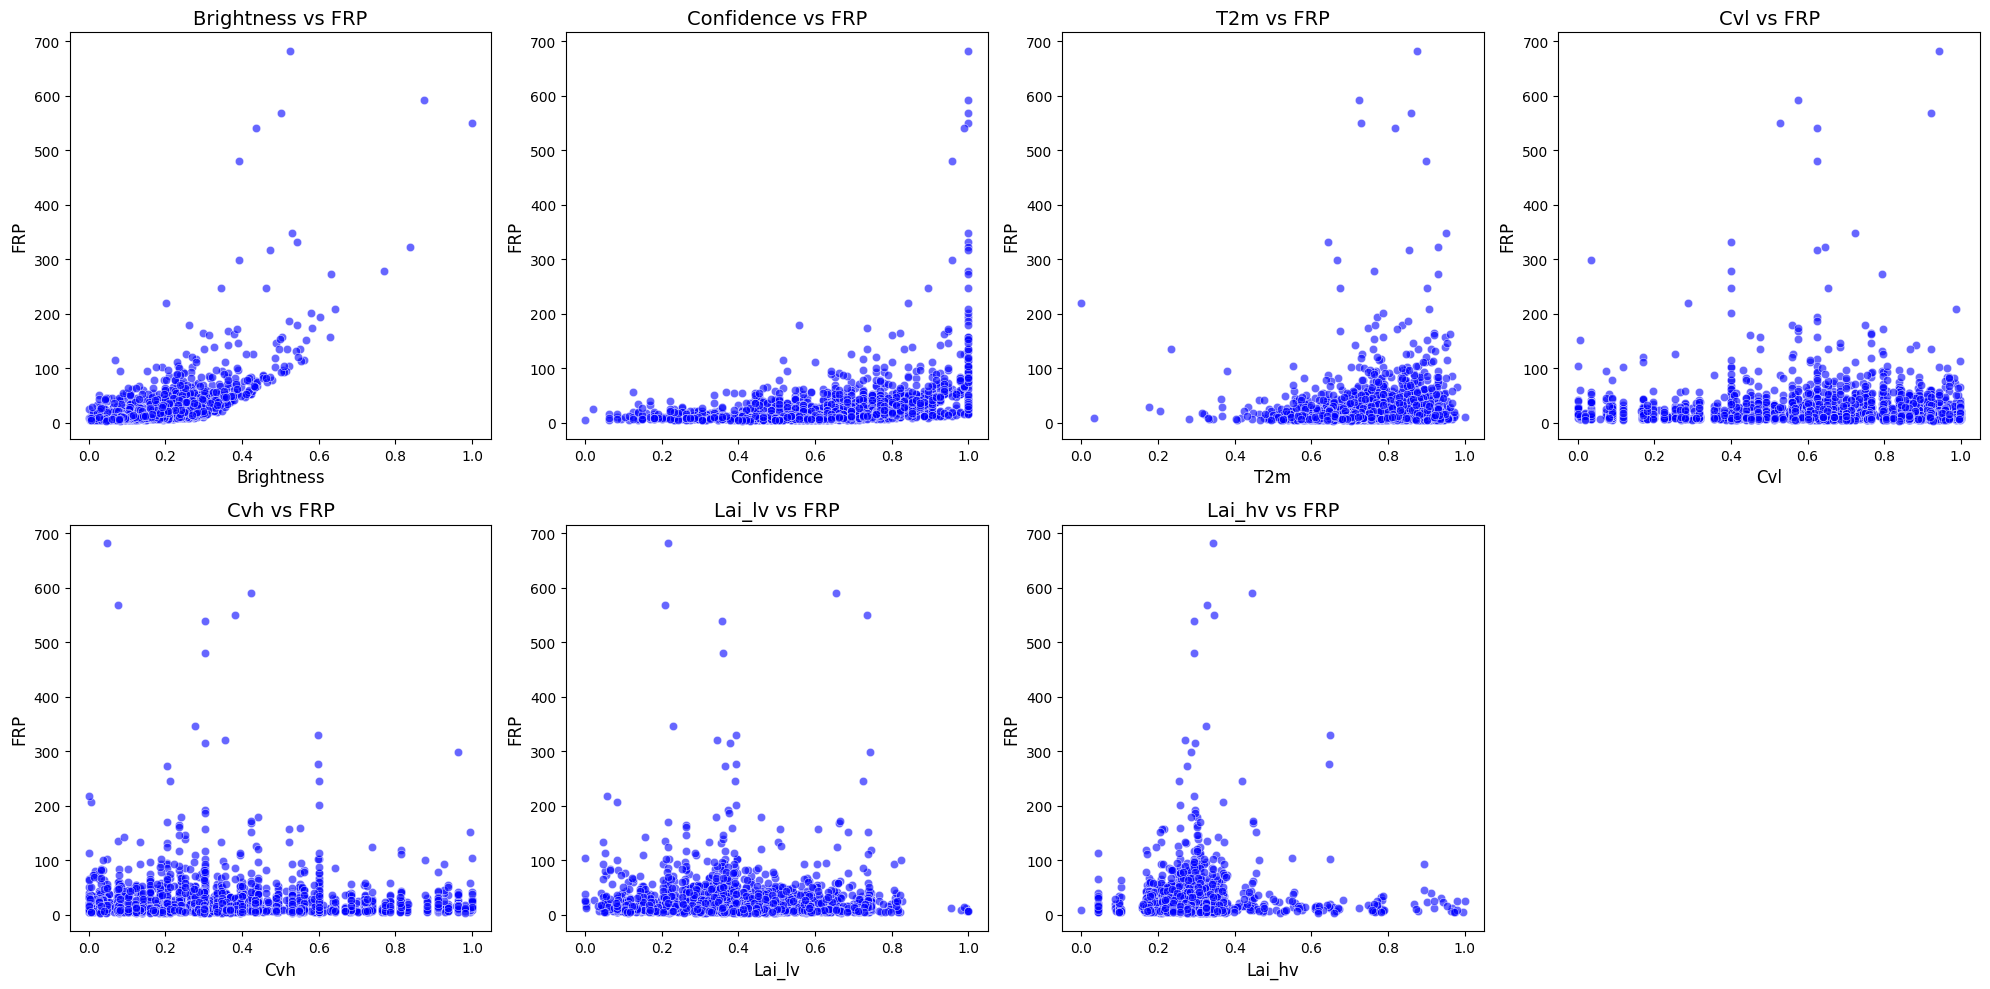

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to compare with FRP
features = ['brightness', 'confidence', 't2m', 'cvl', 'cvh', 'lai_lv', 'lai_hv']

# Set up a grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

# Generate scatter plots for each feature
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['frp'], alpha=0.6, ax=axes[i], color='blue')
    axes[i].set_title(f'{feature.capitalize()} vs FRP', fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('FRP', fontsize=12)

# Hide the extra subplot if the grid has unused space
if len(features) < len(axes):
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


visualize the minimum and maximum Fire Radiative Power (FRP) across different regions,

In [50]:
import pandas as pd
import plotly.graph_objects as go

# Group data by regions and calculate min and max FRP
region_frp_summary = df.groupby(['region', 'latitude', 'longitude'])['frp'].agg(['min', 'max']).reset_index()

# Initialize the map figure
fig = go.Figure()

# Define a color palette for regions
color_palette = px.colors.qualitative.Plotly  # Using Plotly's qualitative color palette
regions = region_frp_summary['region'].unique()
region_colors = {region: color_palette[i % len(color_palette)] for i, region in enumerate(regions)}

# Add traces for each region, showing separate dots with unique colors
for region in regions:
    region_data = region_frp_summary[region_frp_summary['region'] == region]
    fig.add_trace(
        go.Scattermapbox(
            lat=region_data['latitude'],
            lon=region_data['longitude'],
            mode='markers',
            marker=dict(size=10, color=region_colors[region], opacity=0.7),  # Unique color for each region
            name=region,
            hoverinfo='text',
            hovertext=(
                f"<b>Region:</b> {region}<br>"
                + "Latitude: " + region_data['latitude'].astype(str) + "<br>"
                + "Longitude: " + region_data['longitude'].astype(str) + "<br>"
                + "Min FRP: " + region_data['min'].astype(str) + "<br>"
                + "Max FRP: " + region_data['max'].astype(str)
            ),
            visible=False  # Start with all regions hidden
        )
    )

# Make the first region visible by default
fig.data[0].visible = True

# Create a dropdown menu for region selection
buttons = []
for i, region in enumerate(regions):
    buttons.append(dict(
        label=region,
        method="update",
        args=[
            {"visible": [j == i for j in range(len(regions))]},  # Show only the selected region
            {"title": f"Region-Specific Locations with Min and Max FRP: {region}"}
        ]
    ))

# Add a "Show All" button
buttons.append(dict(
    label="Show All",
    method="update",
    args=[
        {"visible": [True] * len(regions)},  # Show all regions
        {"title": "All Regions with Min and Max FRP"}
    ]
))

# Update layout with dropdown menu
fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        center={"lat": 22.9734, "lon": 78.6569},
        zoom=4,
    ),
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.1,
        "yanchor": "top"
    }],
    title="All Regions with Min and Max FRP",
    title_font=dict(size=20),
    margin=dict(l=50, r=50, t=80, b=50),
    height=800,
    width=1200,
)

# Show the interactive map
fig.show()


In [ ]:
seasonal trends of Fire Radiative Power (FRP) over the years

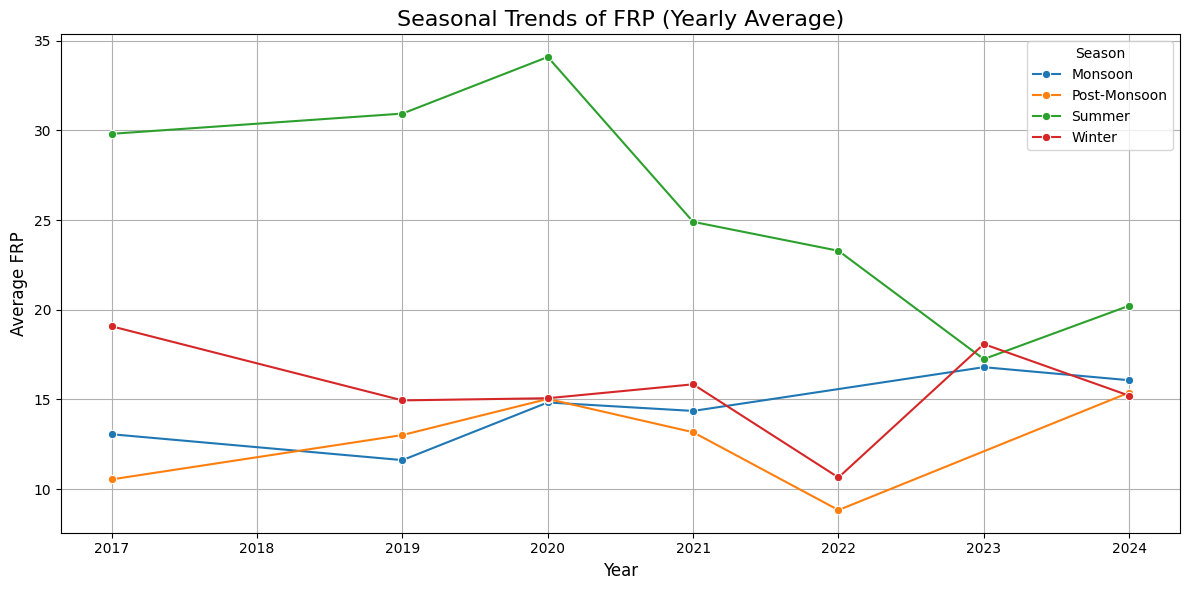

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate FRP by year and season
seasonal_trends = data.groupby(['year', 'season'])['frp'].mean().reset_index()

# Line plot for FRP trends over years and seasons
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_trends, x='year', y='frp', hue='season', marker='o', palette='tab10')

plt.title("Seasonal Trends of FRP (Yearly Average)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average FRP", fontsize=12)
plt.legend(title="Season", fontsize=10)
plt.grid(visible=True)
plt.tight_layout()
plt.show()


In [38]:
df = pd.read_csv("processed_data_19_01_25_home.csv")

Visualize the yearly average Fire Radiative Power (FRP) trends by region.

In [43]:
import pandas as pd
import plotly.express as px

# Use raw string for the file path
file_path = r"C:\Users\Madhu\OneDrive\Desktop\project\processed_data_19_01_25_home.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Check if required columns exist
if not {'year', 'region', 'frp'}.issubset(data.columns):
    raise KeyError("The dataset must contain 'year', 'region', and 'frp' columns.")

# Aggregate FRP by year and region
yearly_summary = data.groupby(['year', 'region'])['frp'].mean().reset_index()

# Create an interactive bar chart with a dropdown for years
fig = px.bar(
    yearly_summary,
    x='region',
    y='frp',
    color='region',
    animation_frame='year',
    title="FRP Trends by Region (Yearly Average)",
    labels={'frp': 'Average FRP', 'region': 'Region'},
    template="plotly_white"
)

fig.update_layout(
    title_font=dict(size=18),
    xaxis_title="Region",
    yaxis_title="Average FRP",
    margin=dict(l=50, r=50, t=80, b=50),
    updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 1500, "redraw": True}, "fromcurrent": True}],
                "label": "Play",
                "method": "animate",
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate",
            },
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top",
    }],
    height=600,
    width=1000
)

fig.show()


 visualize the seasonal average Fire Radiative Power (FRP) intensity across different regions.

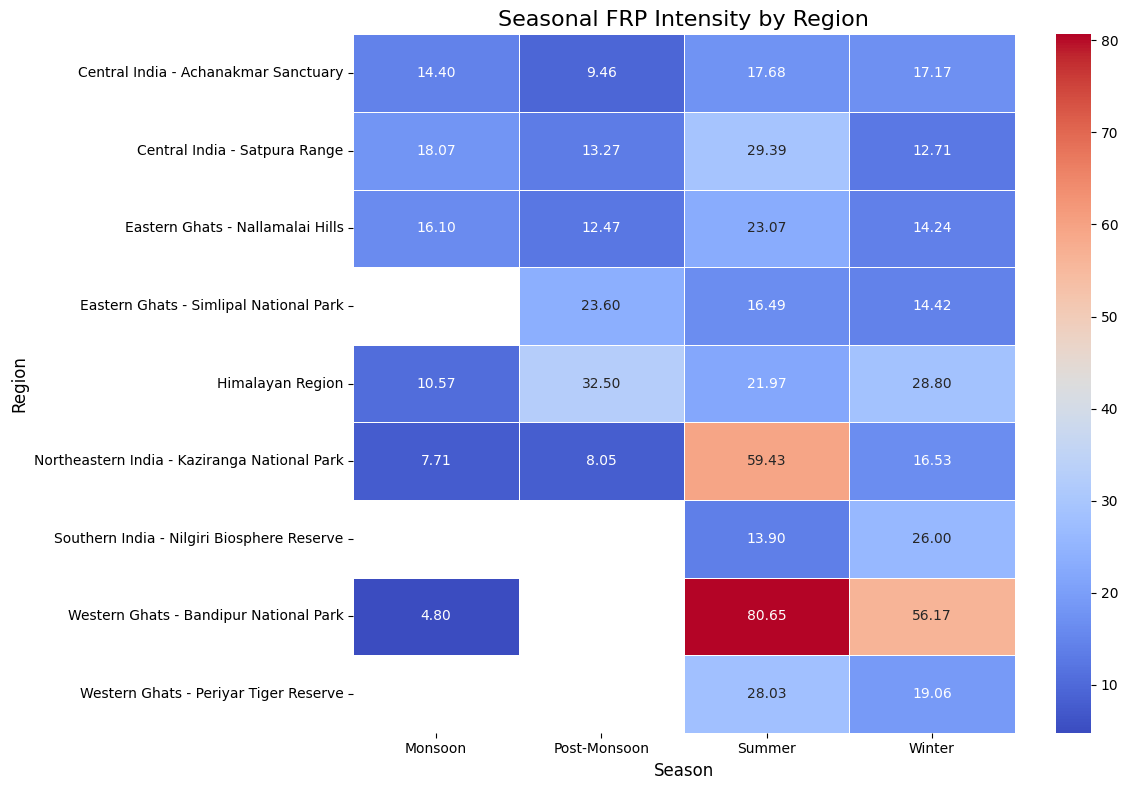

In [28]:
# Pivot data for heatmap
heatmap_data = data.groupby(['region', 'season'])['frp'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Seasonal FRP Intensity by Region", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.tight_layout()
plt.show()
